In [ ]:
!pip install ktrain
!pip install "tensorflow_gpu>=2.0.0"

In [3]:
import ktrain
from ktrain import text

using Keras version: 2.2.4-tf


In [3]:
Train_PATH = '/content/drive/My Drive/IA/train_data.csv'
Teste_PATH = '/content/drive/My Drive/IA/test_data.csv'
NUM_WORDS = 5000
MAXLEN = 164
trn, val, preproc = text.texts_from_csv(Train_PATH,
                     'Text',
                      label_columns = ["M"],
                      val_filepath=Teste_PATH, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=2,preprocess_mode='bert')

detected encoding: utf-8 (if wrong, set manually)
downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: pt


preprocessing test...
language: pt


In [4]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained word vectors [https://arxiv.org/abs/1712.09405]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face [https://arxiv.org/abs/1910.01108]


In [0]:
model = text.text_classifier('bert', trn, preproc=preproc)
learner = ktrain.get_learner(model, train_data=trn, val_data=val)

Is Multi-Label? False
maxlen is 164
done.


In [0]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 164)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 164)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 164, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 164, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [0]:
learner.lr_find(max_epochs = 5)


simulating training for different learning rates... this may take a few moments...
Train on 938 samples
Epoch 1/5
938/938 [==============================] - 78s 83ms/sample - loss: 1.1135 - accuracy: 0.3252
Epoch 2/5
938/938 [==============================] - 59s 63ms/sample - loss: 1.1059 - accuracy: 0.3550
Epoch 3/5
938/938 [==============================] - 58s 62ms/sample - loss: 1.3262 - accuracy: 0.3475
Epoch 4/5
896/938 [===========================>..] - ETA: 2s - loss: 6.9001 - accuracy: 0.3549

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


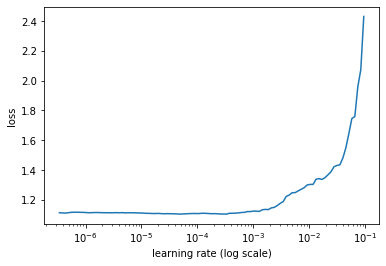

In [0]:
learner.lr_plot()

In [0]:
learner.fit_onecycle(0.0001, 10)



begin training using onecycle policy with max lr of 0.0001...
Train on 938 samples, validate on 235 samples
Epoch 1/10
938/938 [==============================] - 65s 69ms/sample - loss: 1.1211 - accuracy: 0.3454 - val_loss: 1.1219 - val_accuracy: 0.3319
Epoch 2/10
938/938 [==============================] - 62s 66ms/sample - loss: 1.0728 - accuracy: 0.4147 - val_loss: 1.0216 - val_accuracy: 0.5234
Epoch 3/10
938/938 [==============================] - 61s 65ms/sample - loss: 1.1141 - accuracy: 0.3380 - val_loss: 1.1036 - val_accuracy: 0.3362
Epoch 4/10
938/938 [==============================] - 61s 65ms/sample - loss: 1.1255 - accuracy: 0.3433 - val_loss: 1.1190 - val_accuracy: 0.3277
Epoch 5/10
938/938 [==============================] - 60s 64ms/sample - loss: 1.1087 - accuracy: 0.3401 - val_loss: 1.1495 - val_accuracy: 0.3319
Epoch 6/10
938/938 [==============================] - 61s 65ms/sample - loss: 1.1220 - accuracy: 0.3177 - val_loss: 1.1100 - val_accuracy: 0.3277
Epoch 7/10
938

In [0]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [0]:
from sklearn.metrics import roc_auc_score
y_pred = learner.model.predict(val[0], verbose=0)
score = roc_auc_score(val[1], y_pred)
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.798465 



In [0]:
predictor.save('/content/drive/My Drive/IA/model/sent_detector ROC-AUC score:' + str(score))